In [191]:
#导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib import font_manager
import seaborn as sns

## 1.准备工作

### 1.1 数据载入与浏览

In [195]:
#导入数据
df=pd.read_csv('.\movies.csv')

df=df[['id','title','genres','production_companies','release_date','budget','revenue','vote_average','vote_count','credits']]
df.head()

,id,title,genres,production_companies,release_date,budget,revenue,vote_average,vote_count,credits
0,823464,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,Legendary Pictures-Warner Bros. Pictures,2024-03-27,150000000.0,558503759.0,7.246,1878.0,Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...
1,615656,Meg 2: The Trench,Action-Science Fiction-Horror,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...
2,758323,The Pope's Exorcist,Horror-Mystery-Thriller,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...
4,693134,Dune: Part Two,Science Fiction-Adventure,Legendary Pictures,2024-02-27,190000000.0,683813734.0,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722416 entries, 0 to 722415
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722416 non-null  int64  
 1   title                 722410 non-null  object 
 2   genres                511992 non-null  object 
 3   production_companies  337314 non-null  object 
 4   release_date          670677 non-null  object 
 5   budget                722416 non-null  float64
 6   revenue               722416 non-null  float64
 7   vote_average          722416 non-null  float64
 8   vote_count            722416 non-null  float64
 9   credits               497617 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 55.1+ MB


### 1.2 数据清洗与加工

In [198]:
#删除没有上映时间的电影
df=df[df['release_date'].notnull()]

#将上映时间分为年和月
df['year']=pd.to_datetime(df['release_date']).dt.strftime('%Y').astype('int')
df['month']=pd.to_datetime(df['release_date']).dt.strftime('%m').astype('int')
df=df.drop('release_date',axis=1)
df.head()

,id,title,genres,production_companies,budget,revenue,vote_average,vote_count,credits,year,month
0,823464,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,Legendary Pictures-Warner Bros. Pictures,150000000.0,558503759.0,7.246,1878.0,Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...,2024,3
1,615656,Meg 2: The Trench,Action-Science Fiction-Horror,Apelles Entertainment-Warner Bros. Pictures-di...,129000000.0,352056482.0,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,2023,8
2,758323,The Pope's Exorcist,Horror-Mystery-Thriller,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,18000000.0,65675816.0,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,2023,4
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,Skydance-Paramount-di Bonaventura Pictures-Bay...,200000000.0,407045464.0,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,2023,6
4,693134,Dune: Part Two,Science Fiction-Adventure,Legendary Pictures,190000000.0,683813734.0,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,2024,2


In [199]:
#删除片名一样的数据
df['title']=df['title'].str.strip()
df=df.drop_duplicates(subset=['title'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532774 entries, 0 to 722415
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    532774 non-null  int64  
 1   title                 532773 non-null  object 
 2   genres                391329 non-null  object 
 3   production_companies  260759 non-null  object 
 4   budget                532774 non-null  float64
 5   revenue               532774 non-null  float64
 6   vote_average          532774 non-null  float64
 7   vote_count            532774 non-null  float64
 8   credits               376822 non-null  object 
 9   year                  532774 non-null  int32  
 10  month                 532774 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(4)
memory usage: 44.7+ MB


In [200]:
#将电影类型拆分
df['genres']=df['genres'].str.split('-')

### 1.3 数据筛选

In [202]:
#查看数据统计
df.describe()

,id,budget,revenue,vote_average,vote_count,year,month
count,532774.000000,5.327740e+05,5.327740e+05,532774.000000,532774.000000,532774.000000,532774.000000
mean,510435.939472,4.964045e+05,1.291372e+06,2.541880,36.306280,1995.946743,5.886526
std,259224.087460,6.330089e+06,2.319595e+07,3.190891,452.460091,27.909476,3.842941
min,2.000000,0.000000e+00,-1.200000e+01,0.000000,0.000000,1874.000000,1.000000
25%,307545.250000,0.000000e+00,0.000000e+00,0.000000,0.000000,1983.000000,2.000000
50%,507364.500000,0.000000e+00,0.000000e+00,0.000000,0.000000,2008.000000,6.000000
75%,727233.250000,0.000000e+00,0.000000e+00,5.700000,2.000000,2017.000000,9.000000
max,968155.000000,5.000000e+08,2.920357e+09,10.000000,33262.000000,2049.000000,12.000000


##### 评分人数过少的电影，其评分不具有统计意义，这里我们筛选评分人数大于40的数据，其他如票房，预算等为0的数据也应去除.同时，电影上映年份不宜跨度过大，因为时间跨度过大，会引入较多影响因子（如通货膨胀对票房的影响），不利于发现规律

In [204]:
df = df[(df['vote_count'] > 40) & (df['vote_average'] > 0) & (df['revenue'] > 0) & (df['budget'] > 0)]

In [205]:
df=df[df['year']>1990]

<Axes: xlabel='year'>

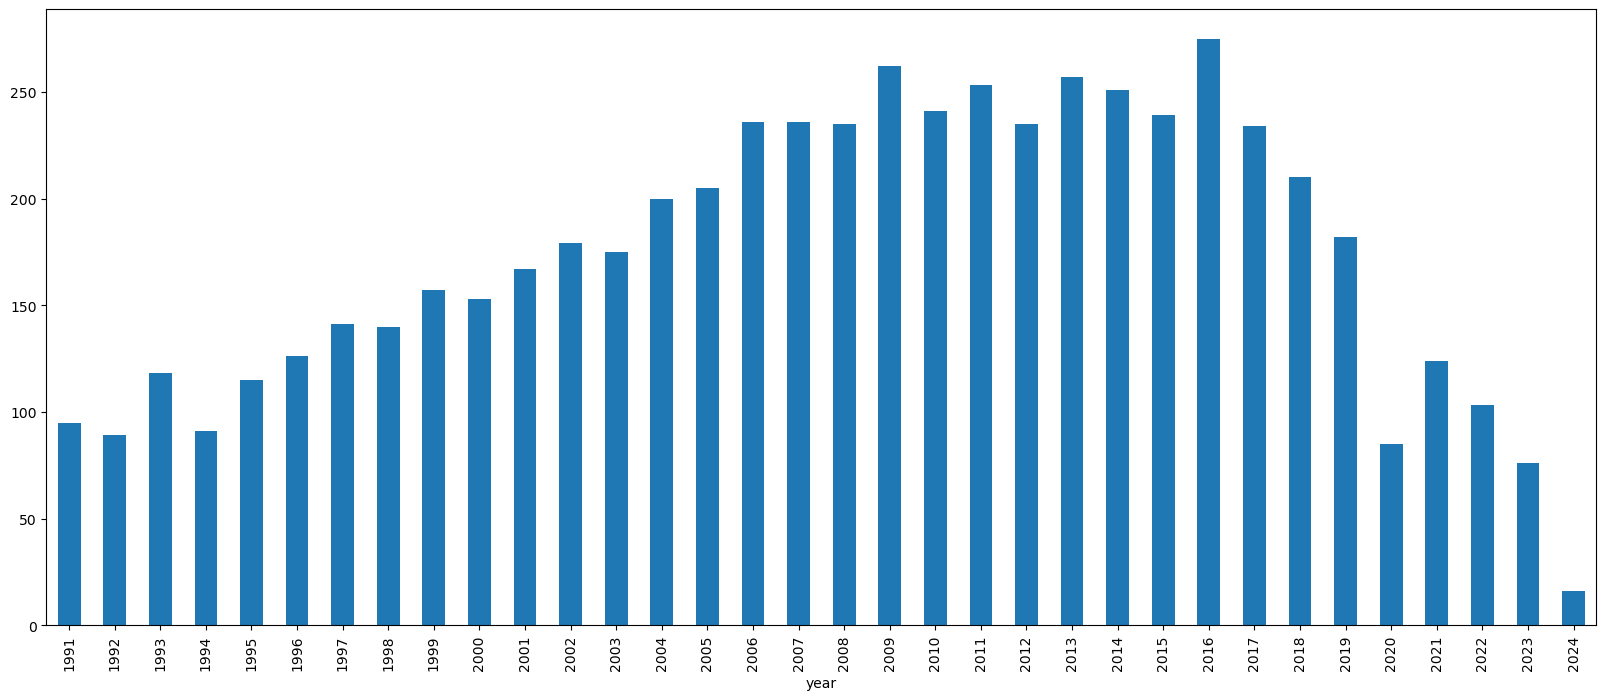

In [206]:
plt.figure(figsize=(20,8))
df.groupby(by=['year'])['title'].count().plot(kind='bar')

##### 由图可知，进入20世纪以来，每年的电影几乎都在600部以上，在10年后，更是在800部以上，而2019-2024年的数量在600部以下，因此可以以为该数据集并未收集全他们的数据，故范围限定在1991到2018年

In [208]:
df=df[df['year']<2019]
df.head()

,id,title,genres,production_companies,budget,revenue,vote_average,vote_count,credits,year,month
21,150540,Inside Out,"[Animation, Family, Adventure, Drama, Comedy]",Pixar-Walt Disney Pictures,175000000.0,857611174.0,7.915,20531.0,Amy Poehler-Phyllis Smith-Bill Hader-Lewis Bla...,2015,6
53,119450,Dawn of the Planet of the Apes,"[Science Fiction, Action, Drama, Thriller]",TSG Entertainment-Chernin Entertainment-Ingeni...,170000000.0,710644566.0,7.318,10929.0,Andy Serkis-Jason Clarke-Toby Kebbell-Gary Old...,2014,7
78,283995,Guardians of the Galaxy Vol. 2,"[Adventure, Action, Science Fiction]",Marvel Studios,200000000.0,863756051.0,7.623,19621.0,Chris Pratt-Zoe Saldaña-Dave Bautista-Vin Dies...,2017,4
104,603,The Matrix,"[Action, Science Fiction]",Village Roadshow Pictures-Groucho II Film Part...,63000000.0,463517383.0,8.217,24995.0,Keanu Reeves-Laurence Fishburne-Carrie-Anne Mo...,1999,3
110,411,"The Chronicles of Narnia: The Lion, the Witch ...","[Adventure, Family, Fantasy]",Walt Disney Pictures-Walden Media-C.S. Lewis C...,180000000.0,745013115.0,7.120,9361.0,Georgie Henley-Skandar Keynes-William Moseley-...,2005,12


## 2 票房和评分分析

### 2.0 票房和评分预览

#### 2.0.1 票房TOP10

In [212]:
df.sort_values(by='revenue',ascending=False)[['id','title','revenue','budget','genres']][0:10]

,id,title,revenue,budget,genres
150,19995,Avatar,2.920357e+09,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]"
305,597,Titanic,2.187464e+09,200000000.0,"[Drama, Romance]"
1031,140607,Star Wars: The Force Awakens,2.068224e+09,245000000.0,"[Adventure, Action, Science Fiction]"
261,299536,Avengers: Infinity War,2.052415e+09,300000000.0,"[Adventure, Action, Science Fiction]"
549,135397,Jurassic World,1.671537e+09,150000000.0,"[Action, Adventure, Science Fiction, Thriller]"
576,24428,The Avengers,1.518816e+09,220000000.0,"[Science Fiction, Action, Adventure]"
581,168259,Furious 7,1.515400e+09,190000000.0,"[Action, Thriller, Crime]"
715,99861,Avengers: Age of Ultron,1.405404e+09,365000000.0,"[Action, Adventure, Science Fiction]"
1257,284054,Black Panther,1.349926e+09,200000000.0,"[Action, Adventure, Science Fiction]"
384,12445,Harry Potter and the Deathly Hallows: Part 2,1.341511e+09,125000000.0,"[Fantasy, Adventure]"


##### 这10部影片预算都是亿级（美元）的，票房是十亿级的，属于高投入高收益的影片.
##### 其中有9部是动作片，7部冒险片，6部科幻片，1部爱情片，显然电影类型对票房是有影响的.

#### 2.0.2 票房、预算和投资回报率（ROI）变换趋势

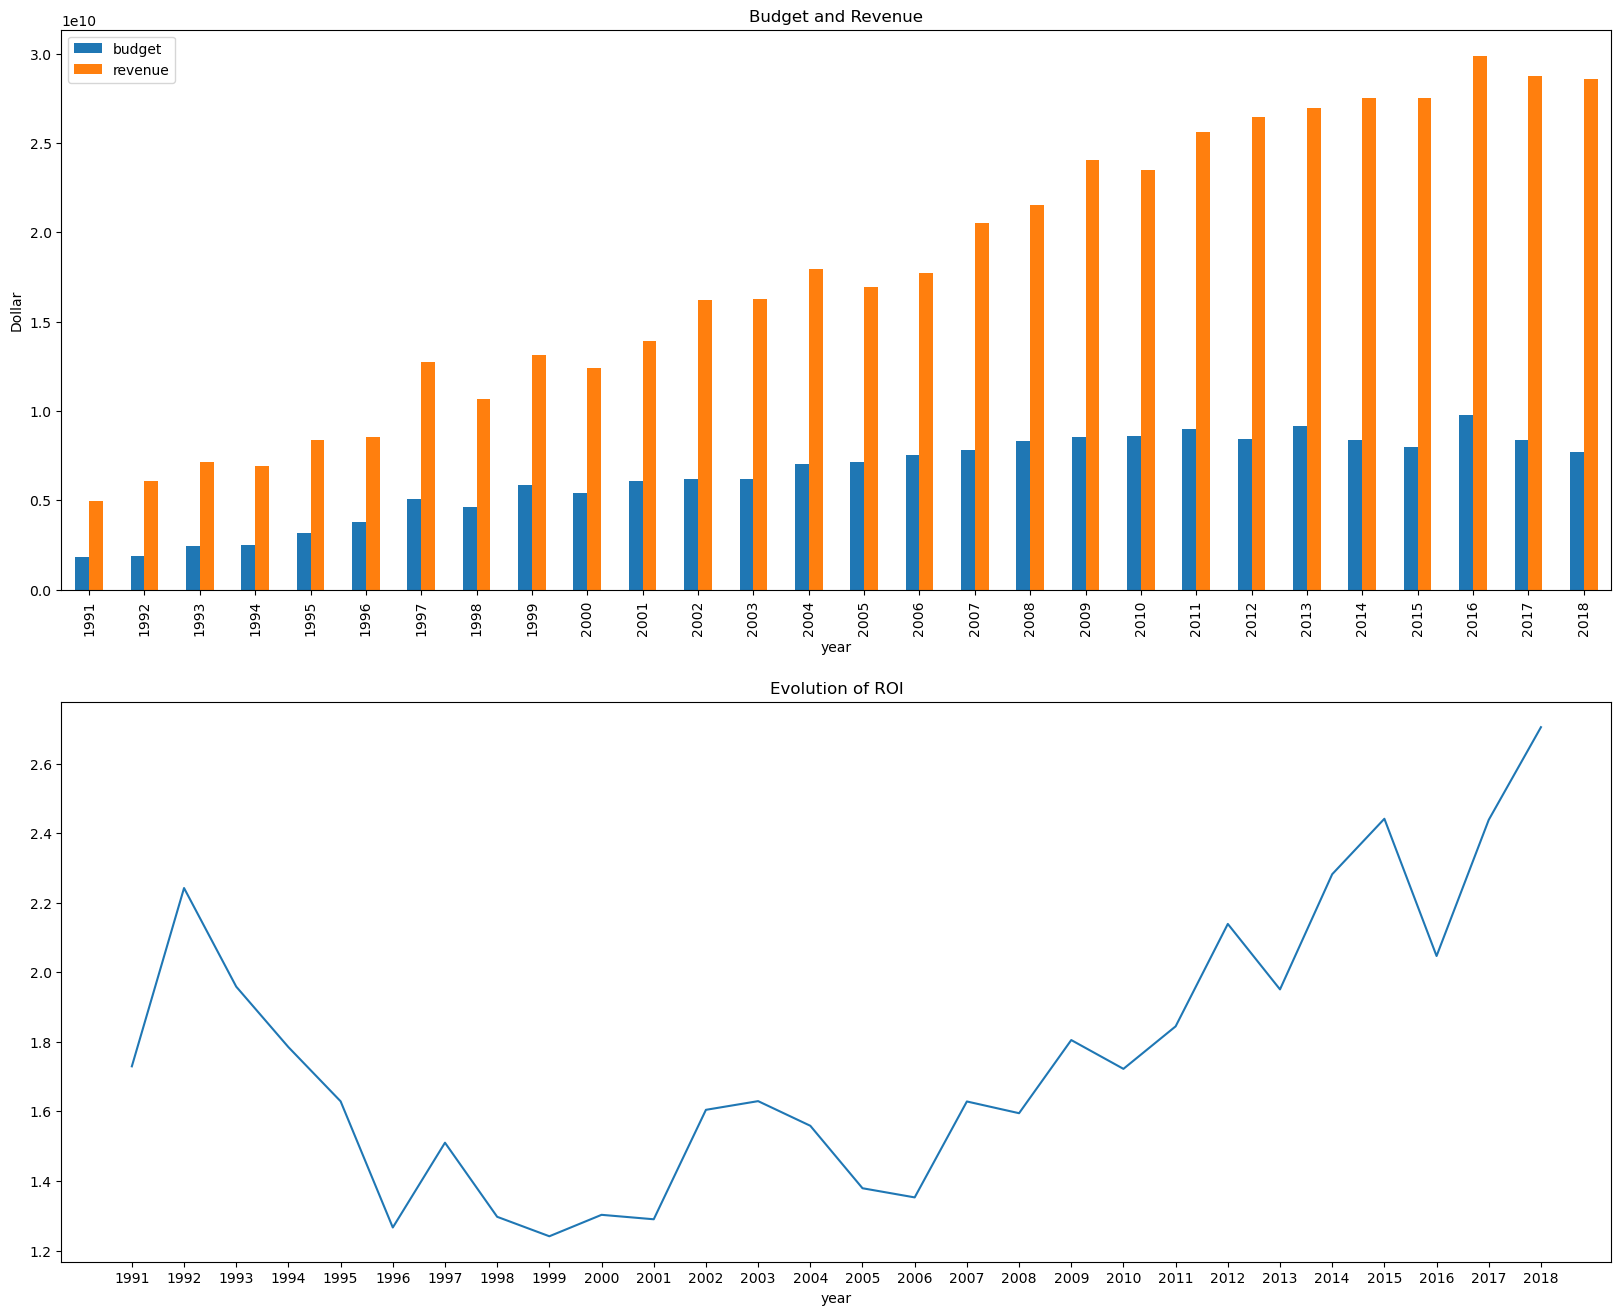

In [215]:
b_r = df.groupby(by=['year'])[['budget','revenue']].sum()
b_r['ROI']=(b_r.revenue - b_r.budget) / b_r.budget

#画图

fig,axes=plt.subplots(2,1,figsize=(20,16))

b_r.iloc[:,0:2].plot(kind='bar',ax=axes[0],title='Budget and Revenue',ylabel='Dollar')
b_r.ROI.plot(ax=axes[1],title='Evolution of ROI')

_x = list(b_r.index)

plt.xticks(_x,_x)
plt.show()

##### 进入20世纪以来，电影制作经费并没有显著的增长，但票房收入整体呈上升趋势，相应地,ROI从2000年的1.3到18年的2.9，电影行业正处于稳步上升的阶段.

#### 2.0.3 评分TOP10

In [218]:
df.sort_values('vote_average',ascending=False)[['id','title','vote_average','genres']][0:10]

,id,title,vote_average,genres
600,278,The Shawshank Redemption,8.702,"[Drama, Crime]"
1032,424,Schindler's List,8.572,"[Drama, History, War]"
2682,19404,Dilwale Dulhania Le Jayenge,8.566,"[Comedy, Drama, Romance]"
848,129,Spirited Away,8.541,"[Animation, Family, Fantasy]"
426,155,The Dark Knight,8.513,"[Drama, Action, Crime, Thriller]"
821,497,The Green Mile,8.507,"[Fantasy, Drama, Crime]"
778,122,The Lord of the Rings: The Return of the King,8.500,"[Adventure, Fantasy, Action]"
42793,554386,Evanescence: Synthesis Live,8.500,[Music]
690,680,Pulp Fiction,8.489,"[Thriller, Crime]"
1068,13,Forrest Gump,8.480,"[Comedy, Drama, Romance]"


##### 1.票房TOP10中没有一部电影出现在评分TOP10中，因此可以猜测票房和评分可能没有很强的关联性.
##### 2.这10部片的类型似乎也没有很明显的特征

#### 2.0.4 评分总体变化趋势

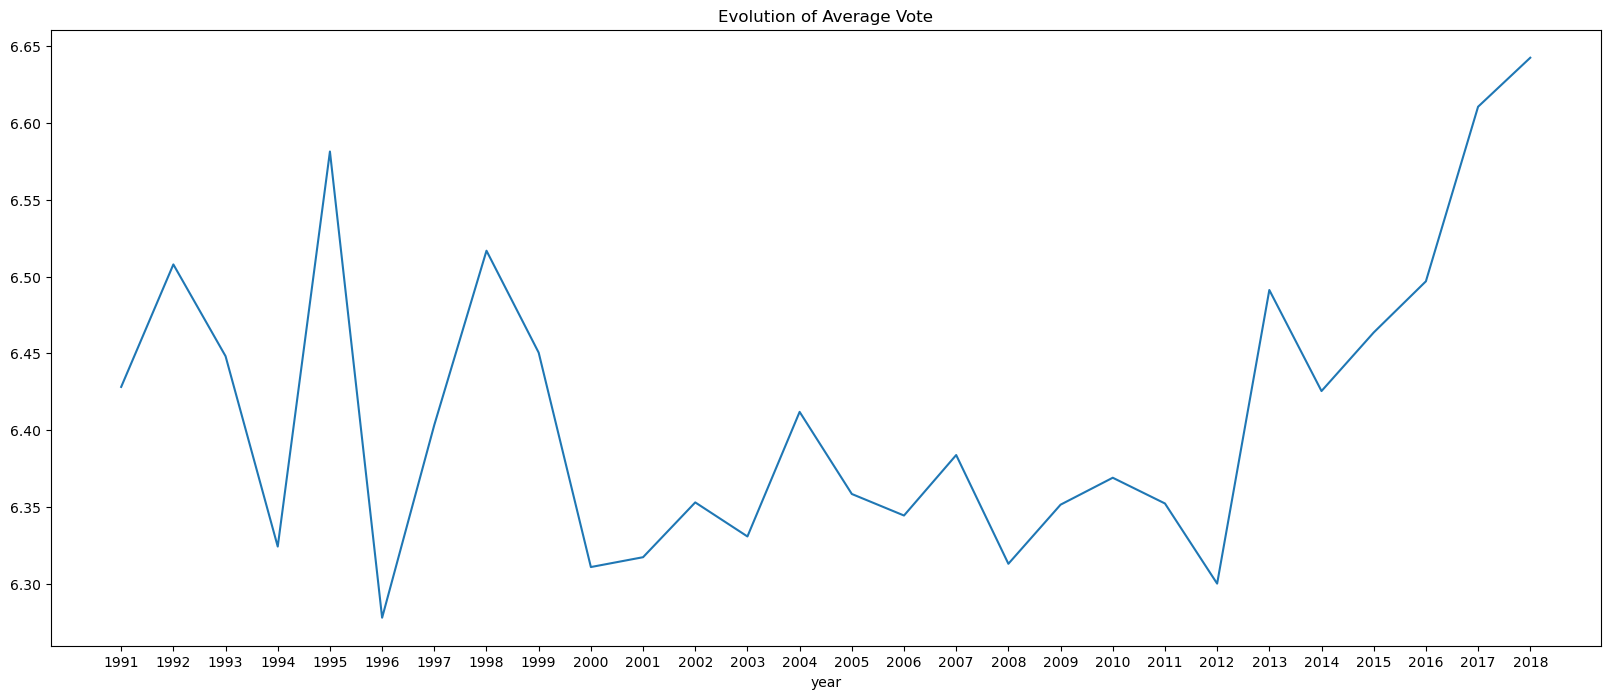

In [221]:
vote=df.groupby('year')['vote_average'].mean()

plt.figure(figsize=(20,8))
vote.plot(title='Evolution of Average Vote')
_x = list(vote.index)
plt.xticks(_x)
plt.show()

##### 电影评分随年份变化的趋势不明显，在6.25到6.5之间浮动

#### 2.0.5 票房和评分的影响因素（数值型变量）

<Axes: >

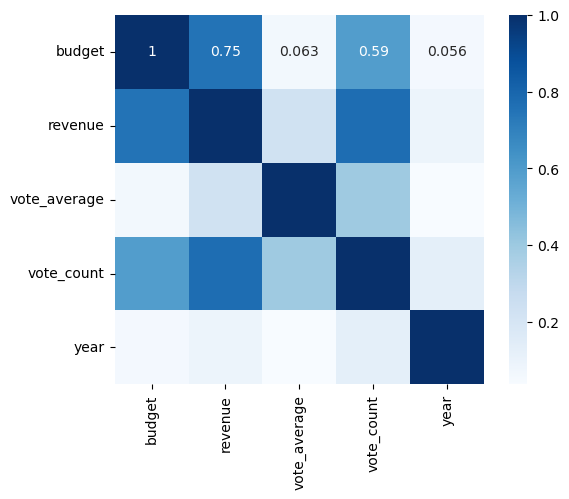

In [224]:
df1=df[['budget','revenue','vote_average','vote_count','year']]
sns.heatmap(df1.corr(),annot=True,vmax=1,square=True,cmap='Blues')

##### 1.票房与预算、评论数的相关性较大.
##### 2.评分与票房、预算、评论数的相关性都不大.

### 2.1 影片类型的影响

#### 2.1.1 影片类型的变化趋势

<Axes: title={'center': 'Frequency of Genres'}, ylabel='genres'>

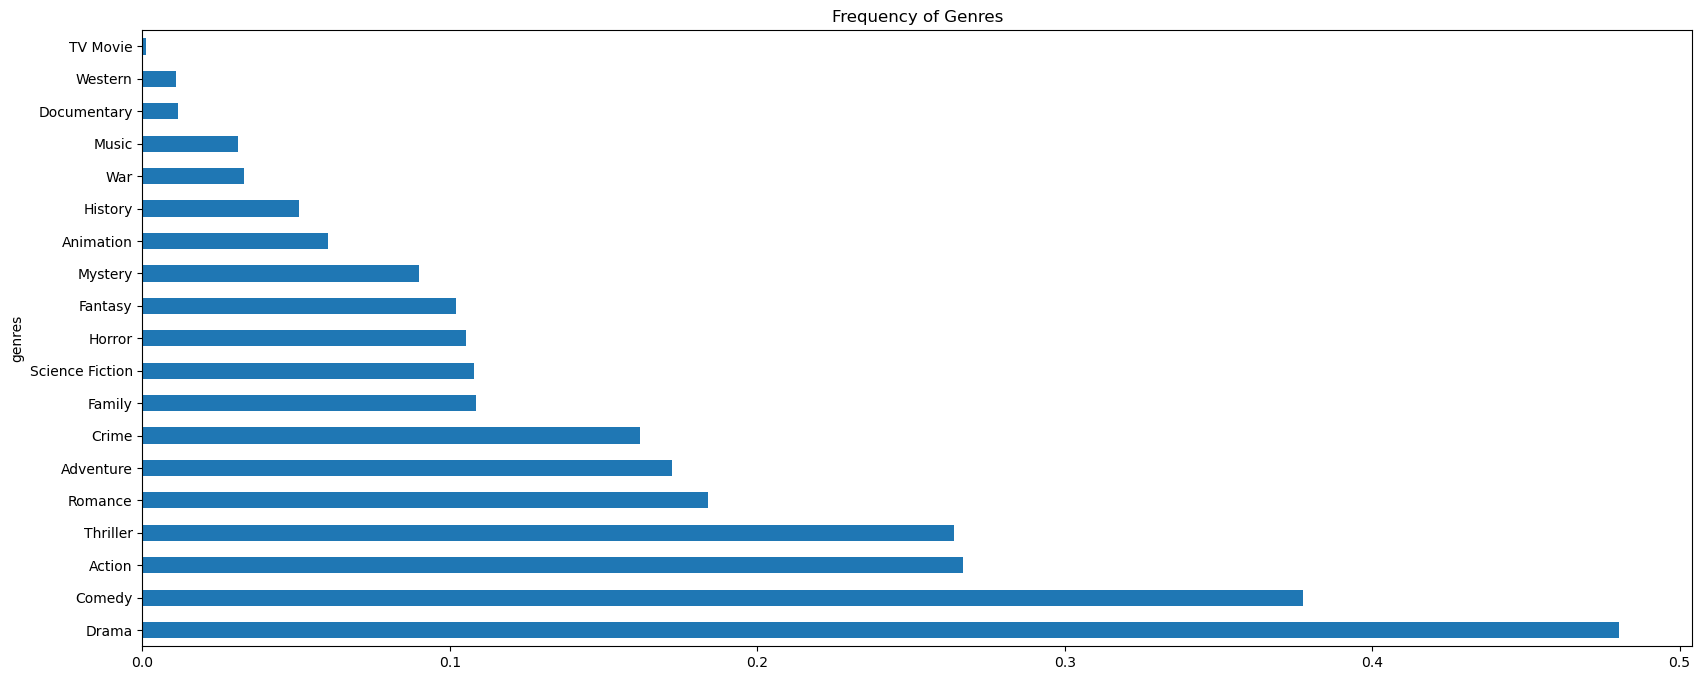

In [228]:
#将数据进行处理，使其便于统计类型
df1=df.explode('genres')
df1['genres']=df1['genres'].str.strip()
df1=df1.reset_index(drop=True)

#每种类型出现的次数除以总的影片数，以此作为该种类型的频数百分比
genre=df1['genres'].value_counts()
genre_avg=genre/len(df)

genre_avg.plot(kind='barh',figsize=(20,8),title='Frequency of Genres')

##### 影片有19中类型，其中剧情、喜剧、惊悚、动作这4类最多，西部片和纪录片最少.
##### 每100部影片中就约有50部剧情片，是大家拍摄电影的首选.

##### 选取前9种类型，观察它们在这10多年间每年的数量与当年影片总数之比的变化：

<Axes: title={'center': 'Evolution of Movies in 9 Gneres'}, xlabel='year'>

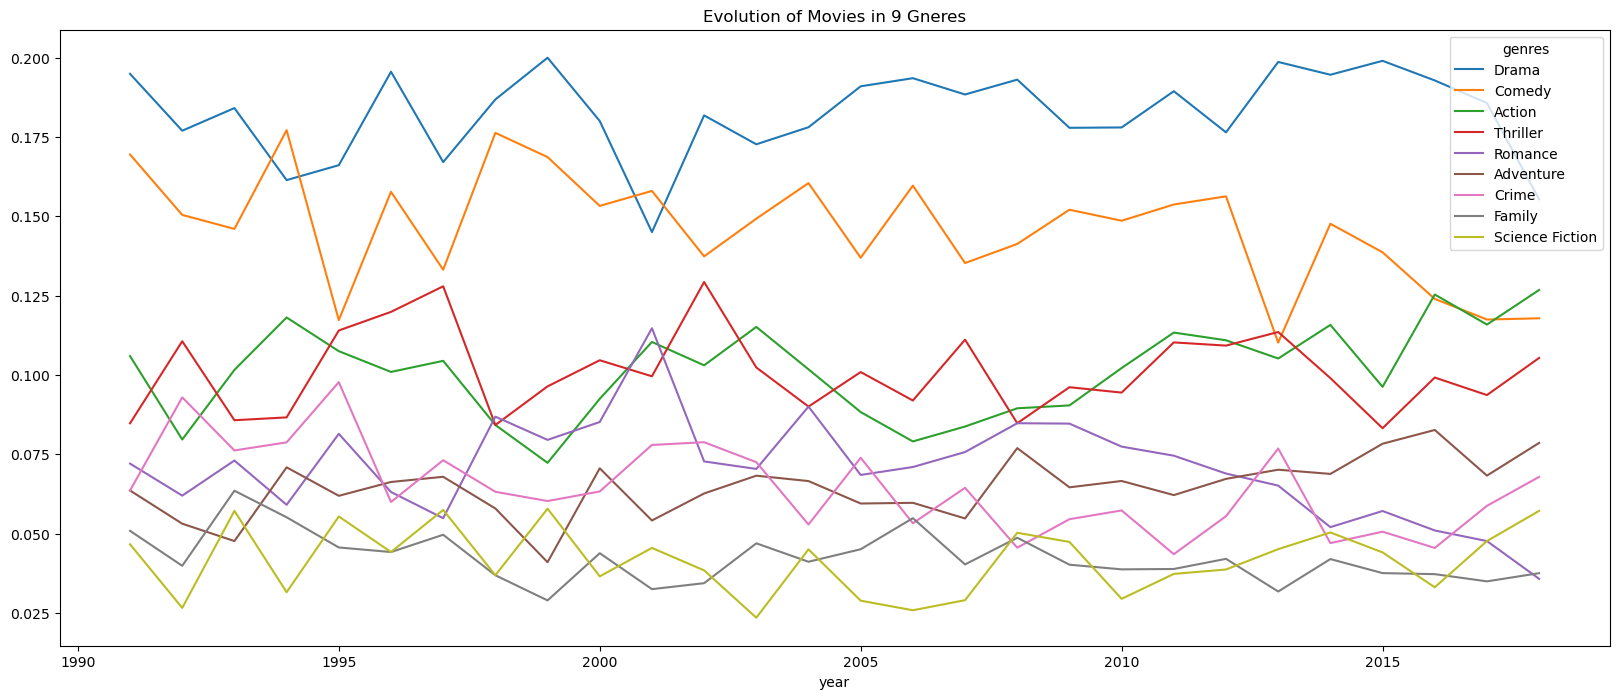

In [231]:
genre_by_year=df.groupby('year').genres.sum()
genre_count=pd.DataFrame([],index=genre_by_year.index,columns=genre.index[0:9])
for i in genre_count.index:
    for j in genre_count.columns:
        genre_count.loc[i,j]=genre_by_year[i].count(j)/len(genre_by_year[i])
genre_count.plot(figsize=(20,8),title='Evolution of Movies in 9 Gneres')

##### 1.各种类型的数量占比有一定的浮动，但总体趋势变化不大.
##### 2.剧情片一直都是拍摄电影的首选，近年来一直处于上升趋势.
##### 3.近年来，喜剧片的占比呈下降趋势.

#### 2.1.2 不同类型影片的票房

##### 票房的影响因素有很多，这里单纯考虑类型对票房的影响，对某种类型，计算所有该类影片的票房，再除以该类影片的数量，对预算也采取同样的方法

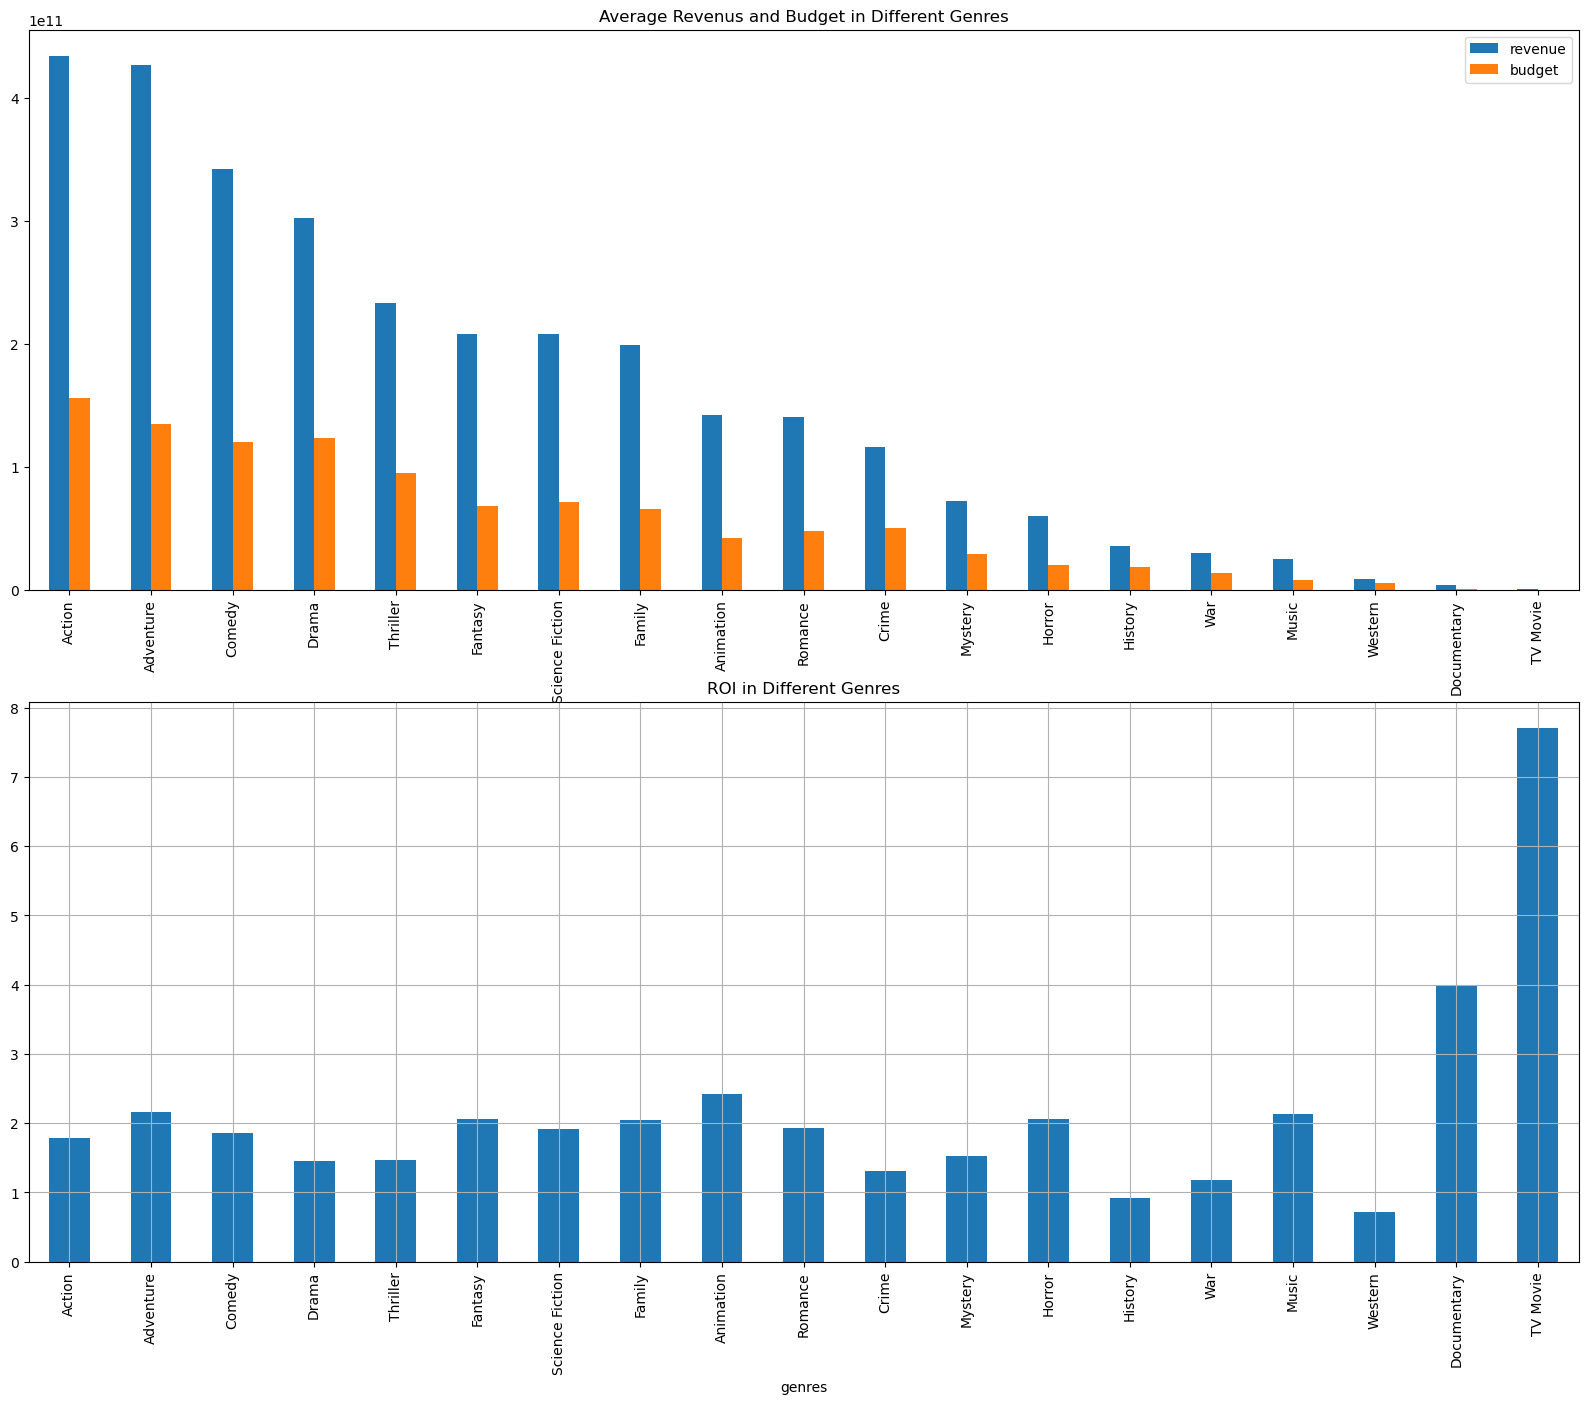

In [235]:
movies_by_genres=pd.DataFrame(np.zeros((len(genre.index),3)),index=genre.index,columns=['revenue','budget','vote'])
for i in range(len(df)):
    for j in df.genres.iloc[i]:
        movies_by_geners.loc[j,'revenue'] += df.revenue.iloc[i] #该类影片的总票房
        movies_by_geners.loc[j,'budget'] += df.budget.iloc[i]   #该类影片的总预算
        movies_by_geners.loc[j,'vote'] += df.vote_average.iloc[i]#该类影片的总评分
movies_by_genres=movies_by_geners.div(genre.values,axis=0)
movies_by_genres['ROI']=(movies_by_geners.revenue-movies_by_geners.budget)/movies_by_geners.budget

#画图
fig,axes=plt.subplots(2,1,figsize=(20,16))

movies_by_geners.sort_values('revenue',ascending=False)[['revenue','budget']].plot(ax=axes[0],kind='bar',title='Average Revenus and Budget in Different Genres')
movies_by_geners.sort_values('revenue',ascending=False)['ROI'].plot(ax=axes[1],kind='bar',title='ROI in Different Genres')

plt.grid()

##### 1.票房最高的影片类型是动作、冒险和喜剧，其次是剧情、恐怖和奇幻，它们比其余类型的影片的票房高了一大截，当然它们的预算也相对较高.
##### 2.票房高的类型其投资回报率也相对不错.
##### 3.剧情片虽然热门，但投资回报率平平.
##### 4.投资回报率最高的是电视电影，其次是纪录片，如果预算有限又想获得高收益，这两种不失为是一种好的选择.
##### 5.西部片、战争片和历史片的投资回报率低，拍摄此类电影需谨慎.


#### 2.1.3 不同类型影片的评分

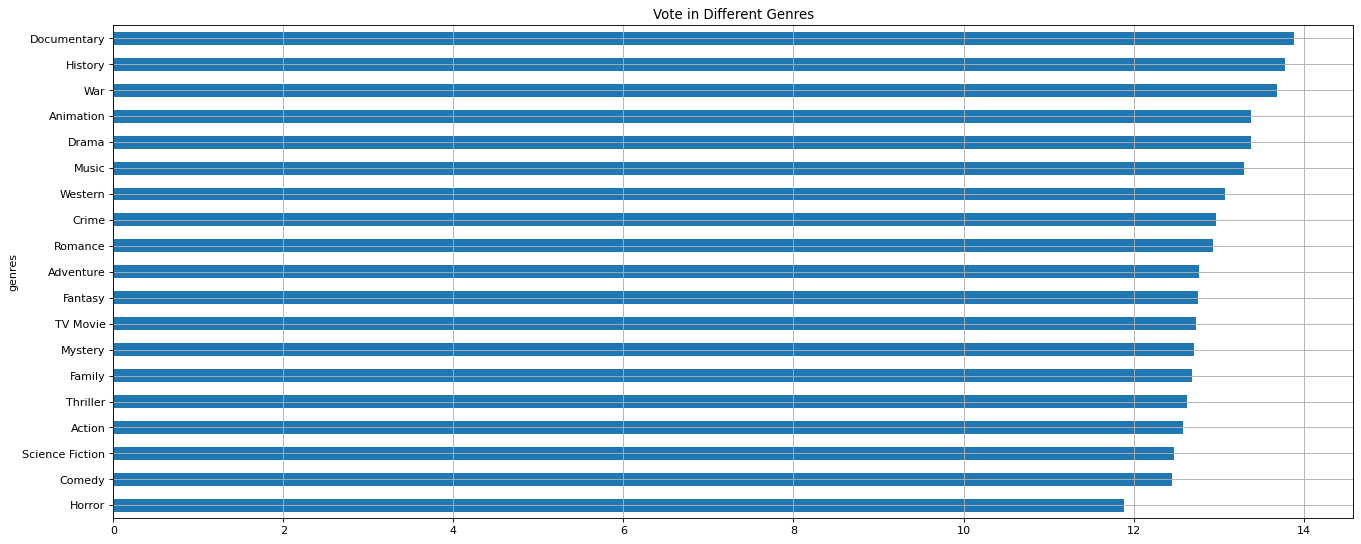

In [240]:
plt.figure(figsize=(20,8),dpi=80)
movies_by_genres.sort_values('vote').vote.plot(kind='barh',title='Vote in Different Genres')
plt.grid()

##### 1.不同类型影片评分较小，极差约1分.
##### 2.纪录片、历史片和战争片的评分在前三，科幻片、喜剧片和恐怖片位列倒数前三.

### 2.2 档期的影响

#### 2.2.1 档期的分布

<Axes: >

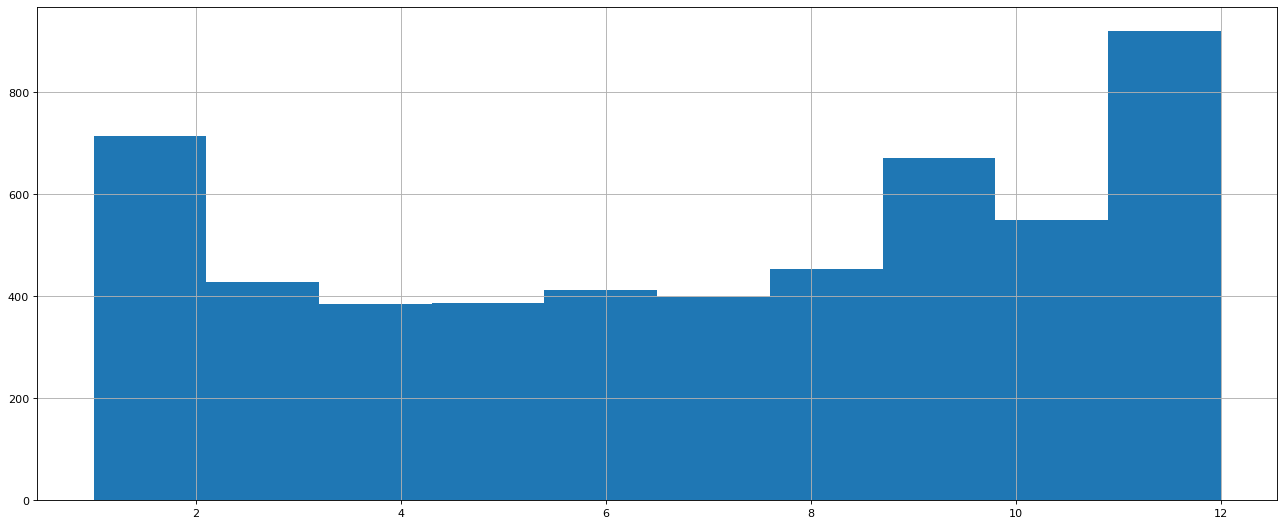

In [244]:
plt.figure(figsize=(20,8),dpi=80)

df.month.hist()

##### 1.电影的出版方喜欢在12月和1月发布新片，这个阶段竞争激烈.
##### 2.3到5月电影的上映数量最少，竞争最小.

#### 2.2.2 票房与档期的关系

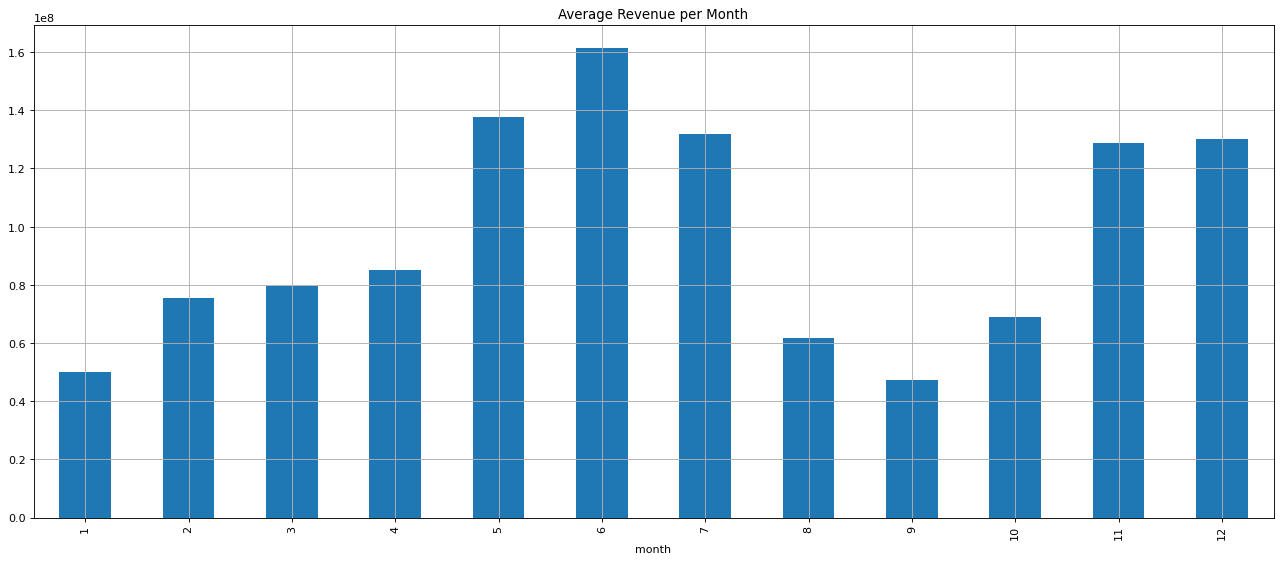

In [247]:
#计算每个月单部影片的平均票房
revenue_month=df.groupby('month').revenue.sum()/df.groupby('month').size()

plt.figure(figsize=(20,8),dpi=80)
revenue_month.plot(kind='bar',title='Average Revenue per Month')
plt.grid()

##### 1.6月份的平均票房最高，9月份的平均票房最低.
##### 2.5到7月上映的电影虽然数量少，但平均票房高，是安排电影档期的最佳选择.

#### 2.2.3 评分与档期的关系

<Axes: title={'center': 'vote_average'}, xlabel='month'>

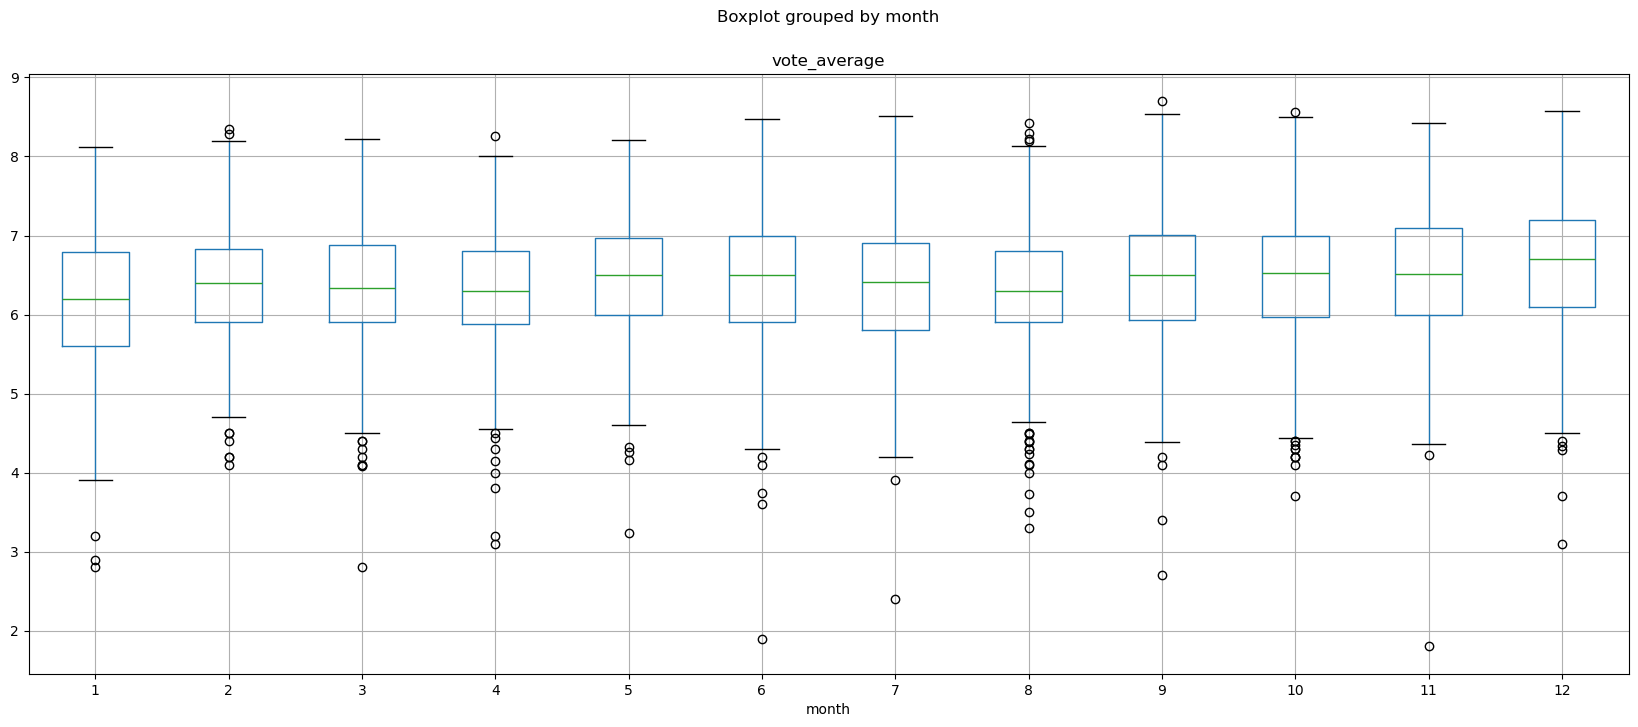

In [250]:
df.boxplot(column='vote_average',by='month',figsize=(20,8))

##### 每个月的评分都在6.5左右，受月份影响较小.

### 2.5 小结
##### 1.电影的投资回报率在上升，在2018年达到了2.7倍.
##### 2.电影票房与评分的相关性不大.
##### 3.剧情片是电影厂商最喜欢拍摄的电影类型.
##### 4.剧情片数量最多，但投资回报率一般.
##### 5.5月到7月是电影上映的最佳档期，竞争压力小，而且容易获得高票房.